 # **Breast Cancer Prediction Using Machine Learning Algorithms**

## Identify the Problem

### Breast cancer is the growth of malignant cell in breast. It is the most common cancer affecting women and nearly accounts for 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women.

### Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be 
### **benign** (not cancerous)
### **malignant** (cancerous).

# Goal

### Since the labels in the data are discrete, the predication falls into two categories, (Malignant or benign). In machine learning this is a classification problem.

### Thus, the goal of this notebook is the application of several machine learning techniques to classify whether the tumor mass is benign or malignant in women residing in the state of Wisconsin, USA. This will help in understanding the important underlaying importance of attributes thereby helping in predicting the stage of breast cancer depending on the values of these attributes.

# Identify Data Sources

### The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

### The columns contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

# Load Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Load Data

In [93]:
dataset = load_breast_cancer()

# conversion of data into DataFrame using pandas datafame function
df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
df['target'] = dataset.target


# EDA
###  The EDA process will help in understanding the trends, potential outliers or correlated variables in our of the dataset. EDA  Exploratory data analysis often confused as data visualization is basically combination of both 

### Data Inspection
### Visualization

### 1. Data Inspecting

In [94]:
# first 5 elements
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [95]:
# total elements in our data
df.size

17639

In [96]:
df.shape

(569, 31)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [98]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### 2. Data Visualization

###  Visualization is the process of projecting the data, or parts of it, into Cartesian space or into abstract images.
### Correlation matrix
### Scatter plot

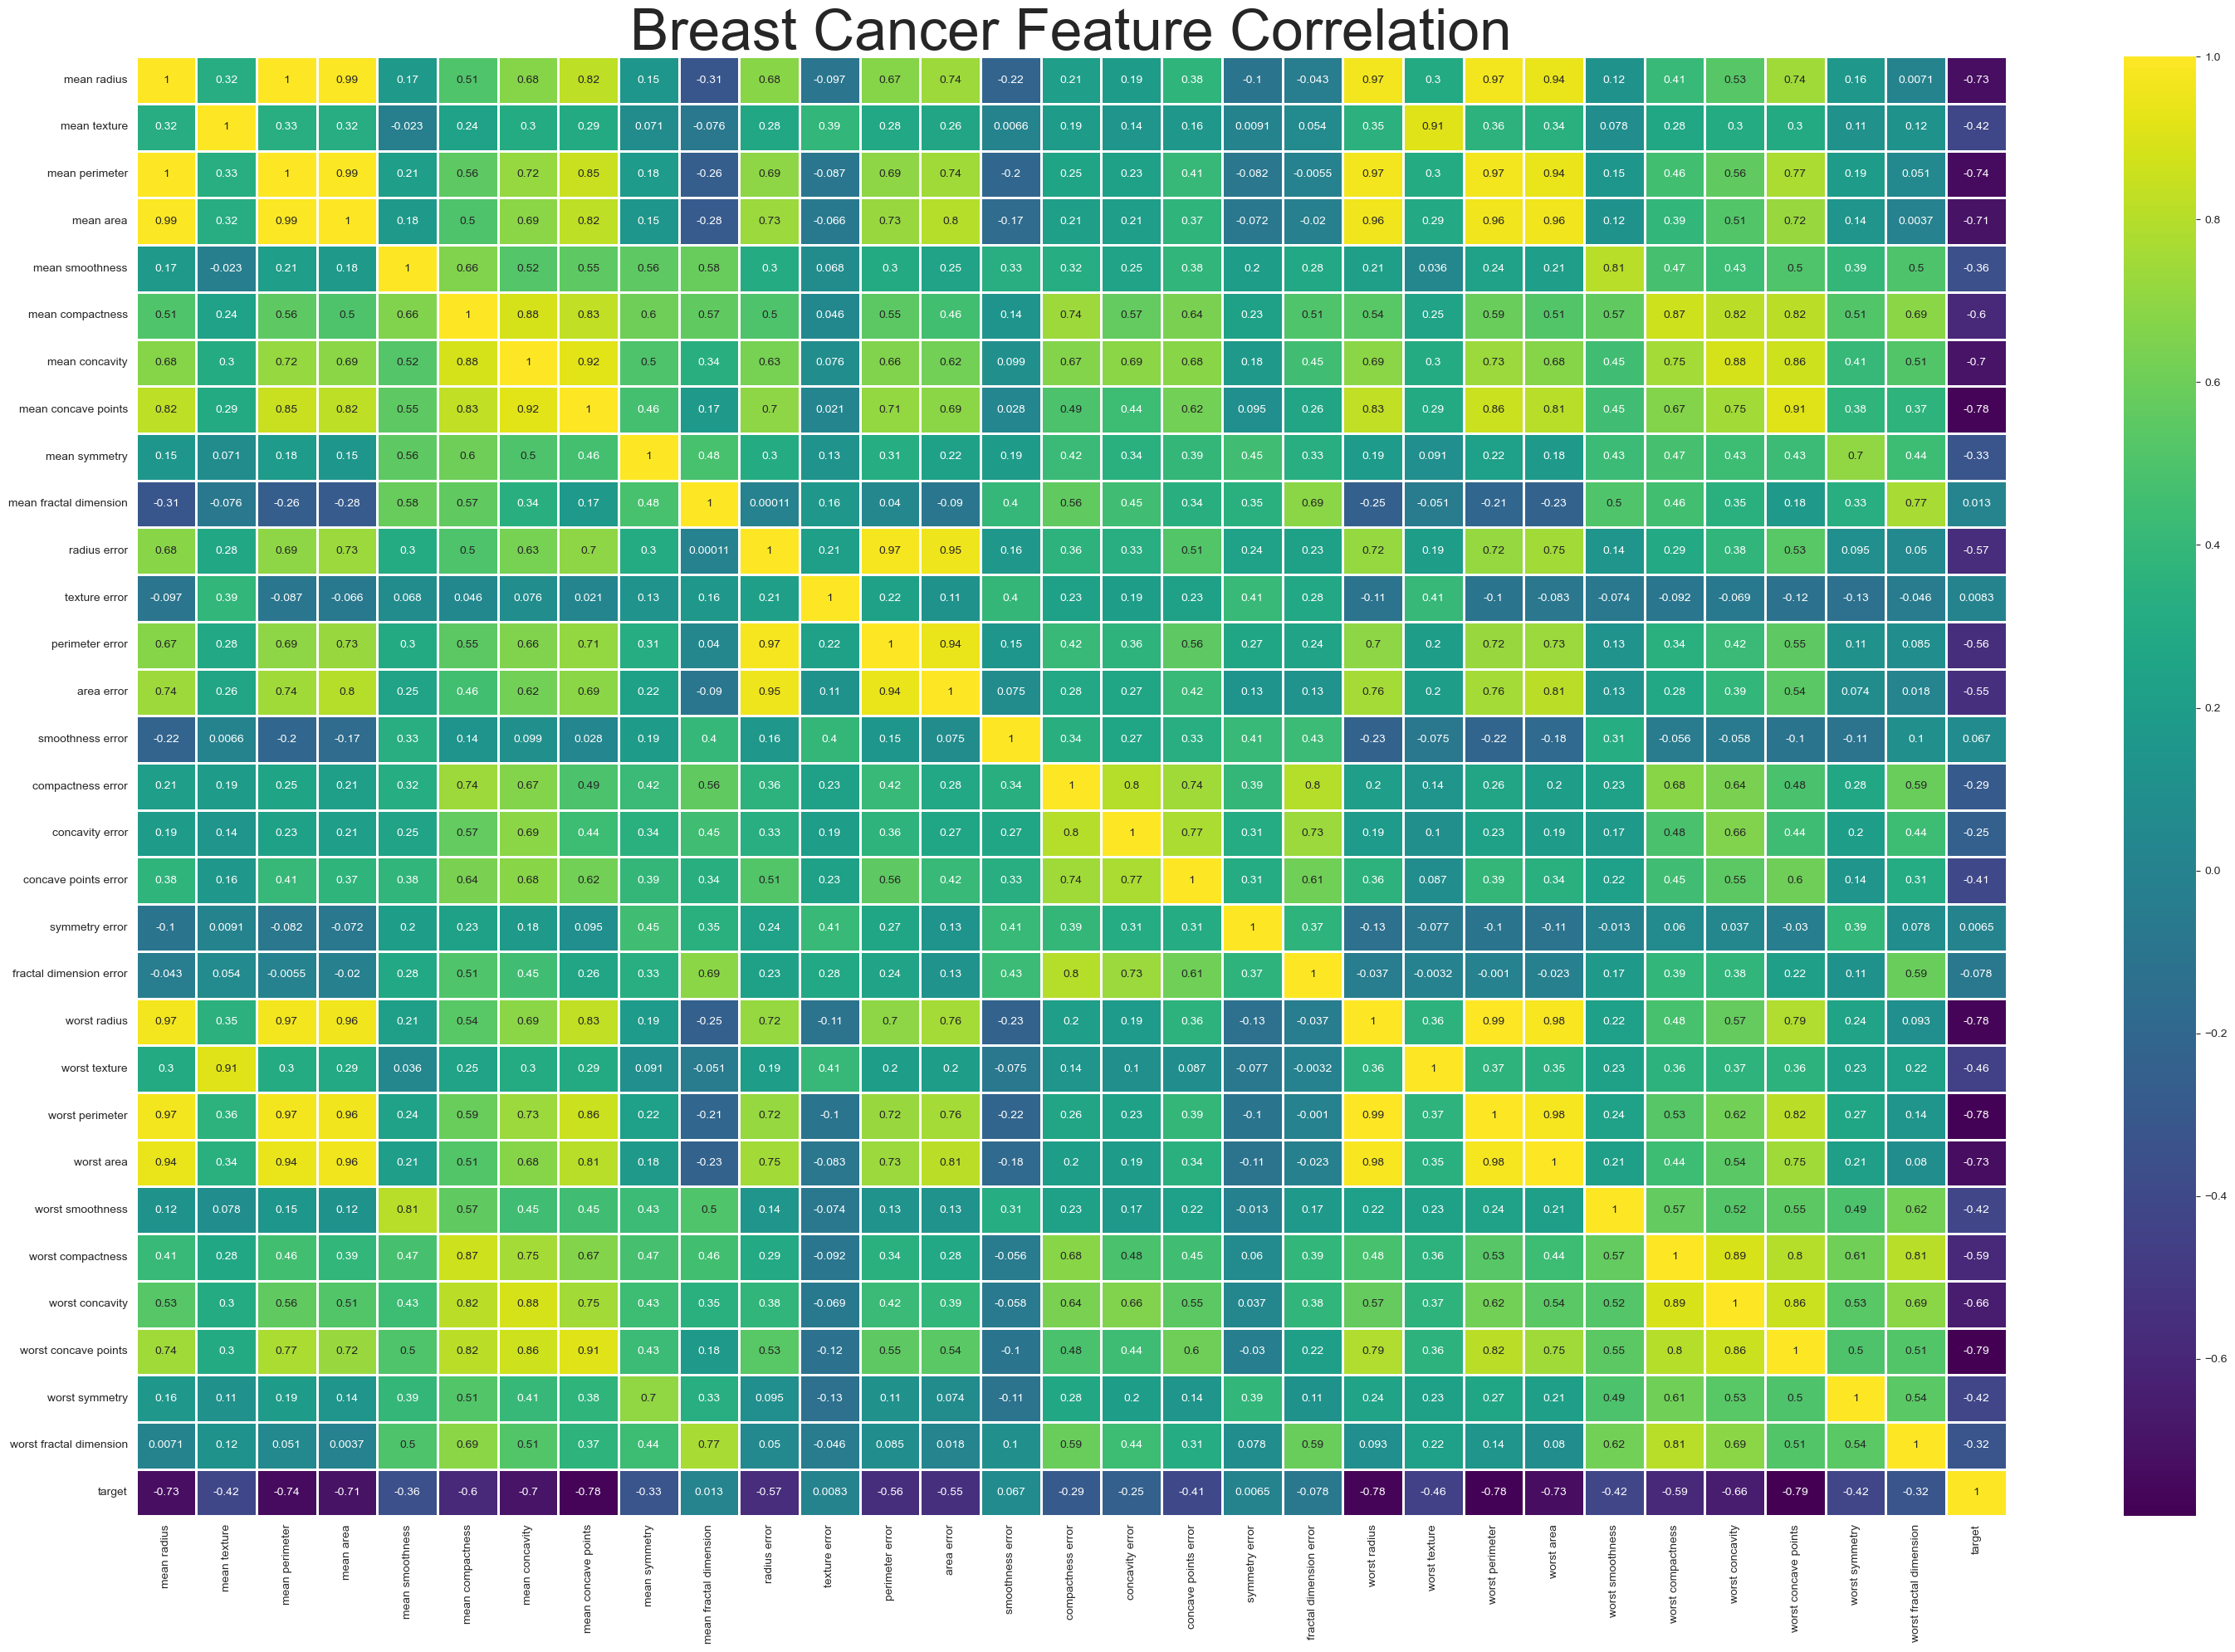

In [99]:
plt.figure(figsize=(30,20))
plt.title('Breast Cancer Feature Correlation', fontsize=50, ha='center')
sns.heatmap(df.corr(), annot=True, linewidths=1, cmap='viridis')
plt.tight_layout()

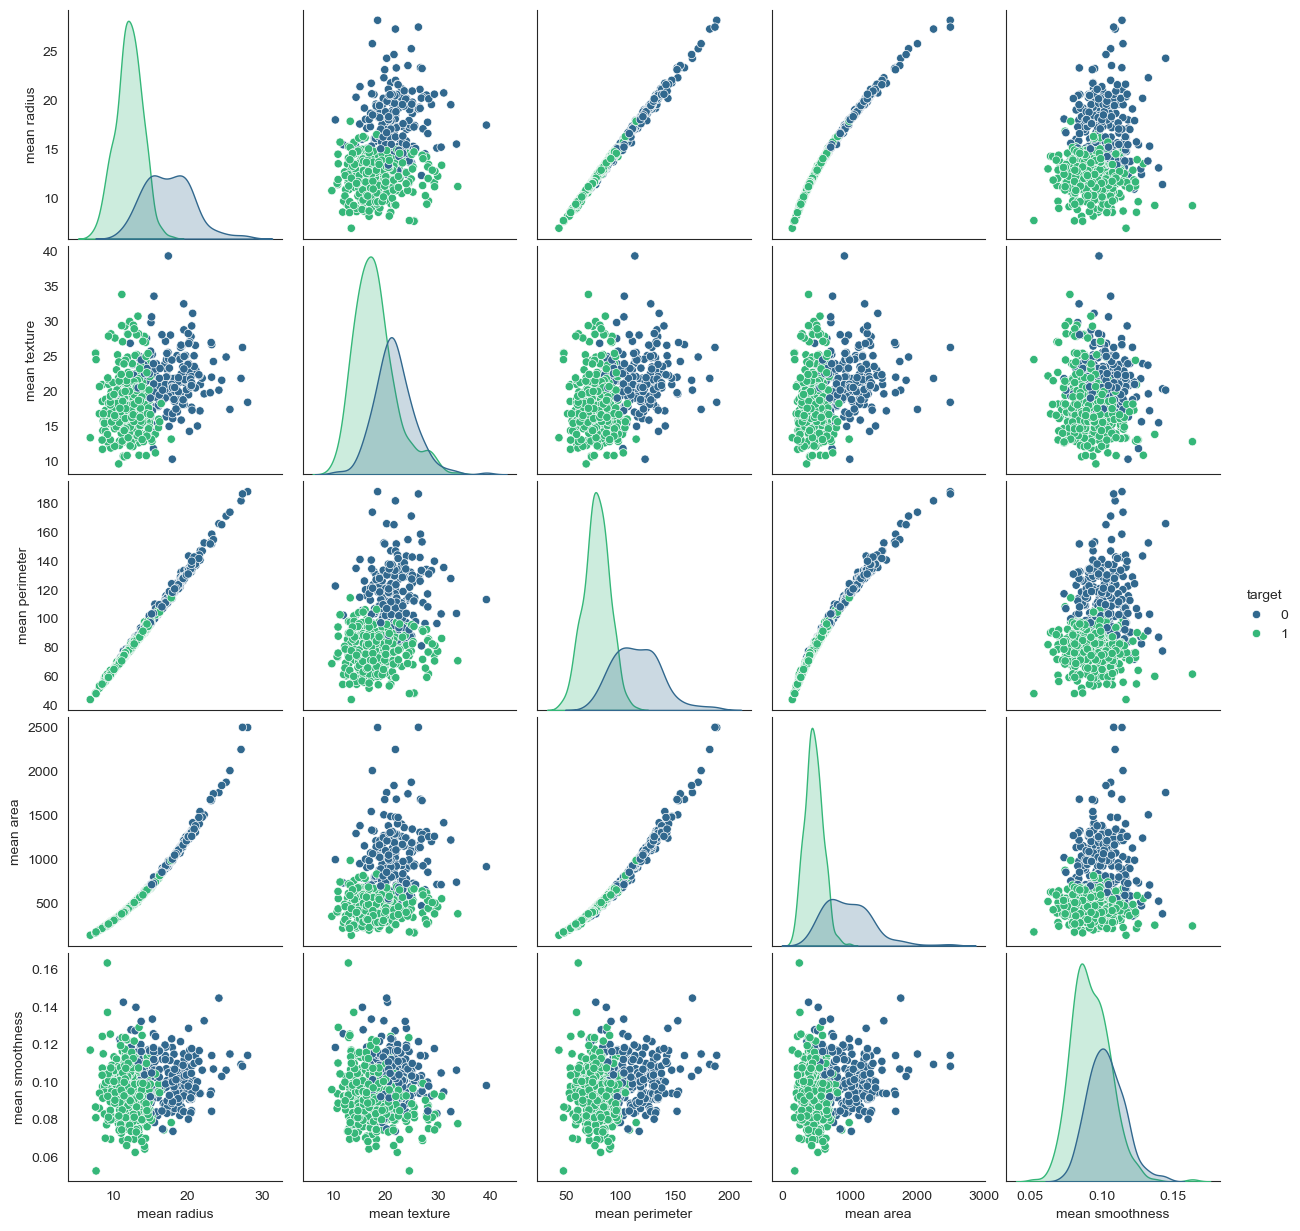

In [100]:
dfp = df[['mean radius','mean texture','mean perimeter', 'mean area','mean smoothness','target']]
sns.pairplot(data=dfp, hue='target', palette='viridis')

<Axes: xlabel='target', ylabel='count'>

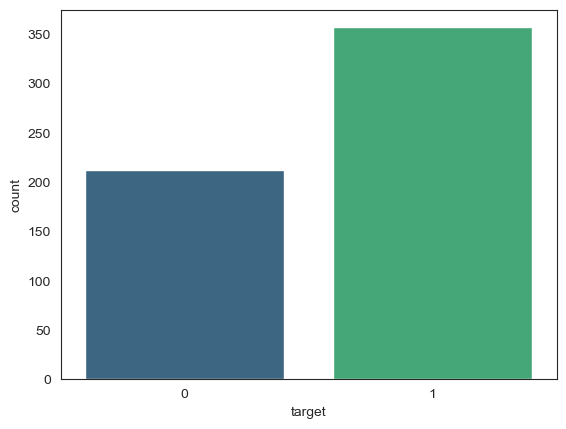

In [101]:
# Check distribution of classes in target
sns.countplot(x= df['target'], label='count', palette='viridis')

# Pre- Processing the Data

### Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use. This involves a number of activities such as:
 
### Handling missing values
### Assigning numerical values to categorical data
### Normalizing the features (so that features on small scales do not dominate when fitting a model to the data)

In [102]:
# check for null values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# Split data into Training and Test Sets

In [103]:
X = df.drop('target', axis='columns')
y = df['target']

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [104]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

### Stratified Train- Test split
#### It is considered for classification problems only.   Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scaling Data

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

# 1. Principal Component Analysis (PCA)
### Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision

###  The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

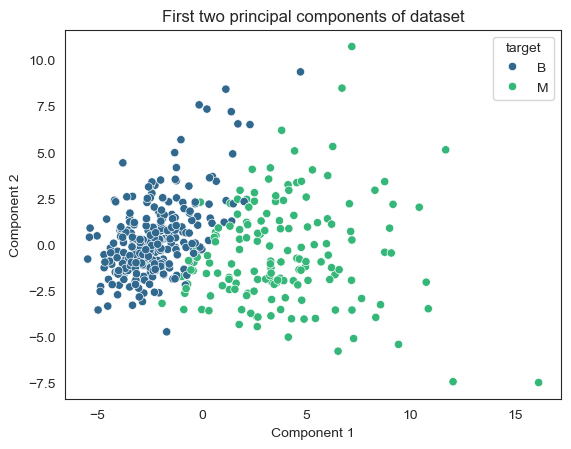

In [107]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))])

X_pca = pipe.fit_transform(X_train, y_train)
sns.scatterplot(x=X_pca[:,0],y= X_pca[:,1], hue=y_train.map({0:'M', 1:'B'}),
    palette = 'viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('First two principal components of dataset');

# 2. Logistic Regression

###  Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable  with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1"

In [108]:
 lgr_pipe = Pipeline(steps=[
 ('scaler', StandardScaler()),
 ('pca', PCA()),
 ('lgr', LogisticRegression())
 ])
 param_grid = {
 'pca__n_components': np.arange(1, X_train.shape[1]//3),  'lgr__C': np.logspace(0, 1, 10)
 }
 lgr_model = GridSearchCV(lgr_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
 lgr_model.fit(X_train, y_train)
 print('Best params: {}'.format(lgr_model.best_params_))
 print('Training Score: {}'.format(lgr_model.score(X_train, y_train)))
 print('CV Score: {}'.format(lgr_model.best_score_))
 print('Test Score: {}'.format(lgr_model.score(X_test, y_test)))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best params: {'lgr__C': 1.6681005372000588, 'pca__n_components': 8}
Training Score: 0.9882629107981221
CV Score: 0.9859097127222982
Test Score: 0.965034965034965


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



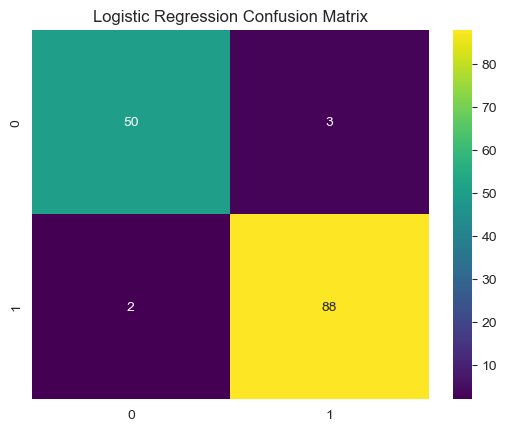

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = lgr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.title('Logistic Regression Confusion Matrix')
print(classification_report(y_test, y_pred))

# 3. Decision Tree

###  A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. However, they can be prone to overfitting, which can lead to poor generalization performance on new data. Therefore, several techniques have been developed to overcome this limitation, such as pruning, ensemble methods, and random forests

In [110]:
DTC_pipe = Pipeline(steps=[
 ('scaler', StandardScaler()),
 ('pca', PCA()),
 ('DTC', DecisionTreeClassifier())
])
param_grid = {'pca__n_components': np.arange(1, X_train.shape[1]//3)}
DTC_model = GridSearchCV(DTC_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
DTC_model.fit(X_train, y_train)
print('Best params: {}'.format(DTC_model.best_params_))
print('Training Score: {}'.format(DTC_model.score(X_train, y_train)))
print('CV Score: {}'.format(DTC_model.best_score_))
print('Test Score: {}'.format(DTC_model.score(X_test, y_test)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best params: {'pca__n_components': 4}
Training Score: 1.0
CV Score: 0.9461012311901505
Test Score: 0.9090909090909091


              precision    recall  f1-score   support

           0       0.84      0.92      0.88        53
           1       0.95      0.90      0.93        90

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143



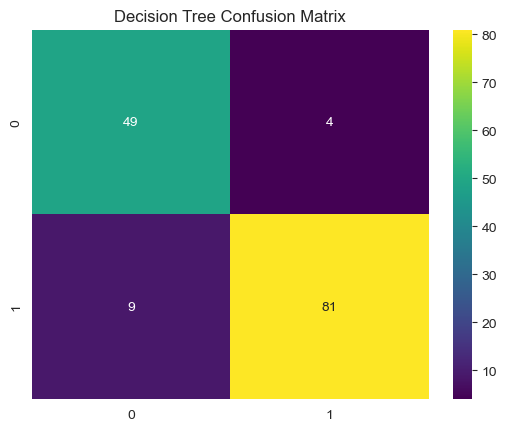

In [111]:
 from sklearn.metrics import classification_report, confusion_matrix
 y_pred = DTC_model.predict(X_test)
 cm = confusion_matrix(y_test, y_pred)
 sns.heatmap(cm, annot=True, cmap = 'viridis')
 plt.title('Decision Tree Confusion Matrix')
 print(classification_report(y_test, y_pred))


# Random Forest

###  Random Forests, also known as random decision forests, are a popular ensemble method that can be used to build predictive models for both classification and regression problems. Ensemble methods use multiple learning models to gain better predictive results - in the case of a random Forest, the model creates an entire forest of random uncorrelated decision trees to arrive at the best possible answer. The random Forest starts with a standard machine learning technique called a “decision tree” which, in ensemble terms, corresponds to our weak learner. In a decision tree, an input is entered at the top and as it traverses down the tree the data gets bucketed into smaller and smaller sets. The random Forest takes this notion to the next level by combining trees with the notion of an ensemble. Thus, in ensemble terms, the trees are weak learners and the random Forest is a strong learner

In [113]:
rdf_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rdf', RandomForestClassifier())
])
param_grid = {
    'rdf__n_estimators': np.arange(200, 1001, 200),
    'rdf__max_depth': np.arange(1,4),
}
rdf_model = GridSearchCV(rdf_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
rdf_model.fit(X_train, y_train)
print('Best params: {}'.format(rdf_model.best_params_))
print('Training Score: {}'.format(rdf_model.score(X_train, y_train)))
print('CV Score: {}'.format(rdf_model.best_score_))
print('Test Score: {}'.format(rdf_model.score(X_test, y_test)))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best params: {'rdf__max_depth': 3, 'rdf__n_estimators': 400}
Training Score: 0.9835680751173709
CV Score: 0.9554582763337894
Test Score: 0.9440559440559441


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



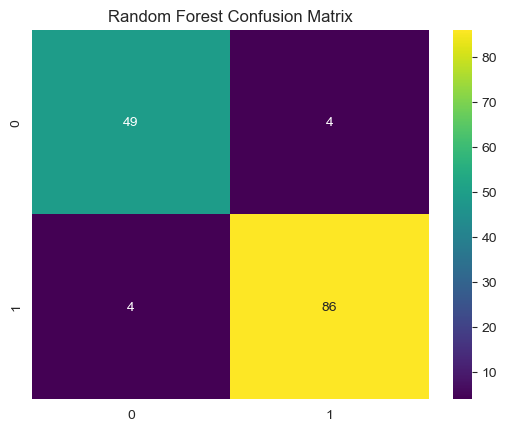

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rdf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title('Random Forest Confusion Matrix')
print(classification_report(y_test, y_pred))

# KNN

###  KNN is essentially classification by finding the most similar data points in the training data, and making an educated guess based on their classifications. K is number of nearest neighbors that the classifier will use to make its prediction. KNN makes predictions based on the outcome of the K neighbors closest to that point. One of the most popular choices to measure this distance is known as Euclidean.

In [118]:
knn_pipe = Pipeline(steps=[
 ('scaler', StandardScaler()),
 ('pca', PCA()),
 ('knn', KNeighborsClassifier())
])
param_grid = {
 'pca__n_components': np.arange(1, X_train.shape[1]+1),
 'knn__n_neighbors': np.arange(1, X_train.shape[1], 2)
}
knn_model = GridSearchCV(knn_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
knn_model.fit(X_train, y_train)
print('Best params: {}'.format(knn_model.best_params_))
print('Training Score: {}'.format(knn_model.score(X_train, y_train)))
print('CV Score: {}'.format(knn_model.best_score_))
print('Test Score: {}'.format(knn_model.score(X_test, y_test)))

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
Best params: {'knn__n_neighbors': 11, 'pca__n_components': 9}
Training Score: 0.9788732394366197
CV Score: 0.974281805745554
Test Score: 0.951048951048951


              precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



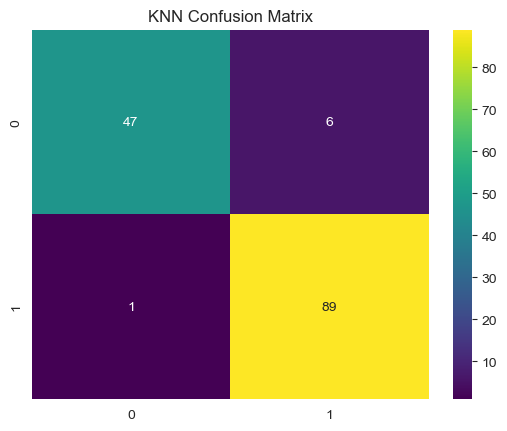

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title('KNN Confusion Matrix')
print(classification_report(y_test, y_pred))


# 6. Gaussian Naive Bayes

### Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data.Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution. An approach to create a simple model is to assume that the data is described by a Gaussian distribution with no co-variance (independent dimensions) between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all what is needed to define such a distribution

In [84]:
 gnb_pipe = Pipeline(steps=[
 ('scaler', StandardScaler()),
 ('pca', PCA()),
 ('gnb', GaussianNB())
 ])
 param_grid = {
 'pca__n_components': np.arange(1, X_train.shape[1]+1)
 }
gnb_model = GridSearchCV(gnb_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
 gnb_model.fit(X_train, y_train)
 print('Best params: {}'.format(gnb_model.best_params_))
 print('Training Score: {}'.format(gnb_model.score(X_train, y_train)))
 print('CV Score: {}'.format(gnb_model.best_score_))
 print('Test Score: {}'.format(gnb_model.score(X_test, y_test)));

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'pca__n_components': 7}
Training Score: 0.9295774647887324
CV Score: 0.9251436388508892
Test Score: 0.916083916083916


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.93      0.93      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



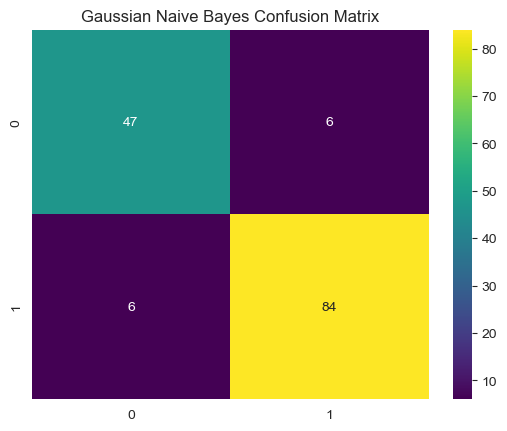

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = gnb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title('Gaussian Naive Bayes Confusion Matrix')
print(classification_report(y_test, y_pred))

# 7. Support Vector Classifier

### SVM depends on supervised learning models and trained by learning algorithms. A SVM generates parallel partitions by generating two parallel lines. For each category of data in a high-dimensional space and uses almost all attributes. It separates the space in a single pass to generate flat and linear partitions. Divide the 2 categories by a clear gap that should be as wide as possible. Do this partitioning by a plane called hyperplane. An SVM creates hyperplanes that have the largest margin in a high dimensional space to separate given data into classes. The margin between the 2 classes represents the longest distance between closest data points of those classes.

In [86]:
 svc_pipe = Pipeline(steps=[
 ('scaler', StandardScaler()),
 ('pca', PCA()),
 ('svc', SVC())
 ])
 param_grid = {
 'pca__n_components': np.arange(1, X_train.shape[1]//3),
 'svc__C': np.logspace(0, 3, 10),
     'svc__kernel': ['rbf'],
    'svc__gamma': np.logspace(-4, -3, 10)
 }
 svc_model = GridSearchCV(svc_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
 svc_model.fit(X_train, y_train)
 print('Best params: {}'.format(svc_model.best_params_))
 print('Training Score: {}'.format(svc_model.score(X_train, y_train)))
 print('CV Score: {}'.format(svc_model.best_score_))
 print('Test Score: {}'.format(svc_model.score(X_test, y_test)));   

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best params: {'pca__n_components': 8, 'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Training Score: 0.9906103286384976
CV Score: 0.9906155950752394
Test Score: 0.972027972027972


              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



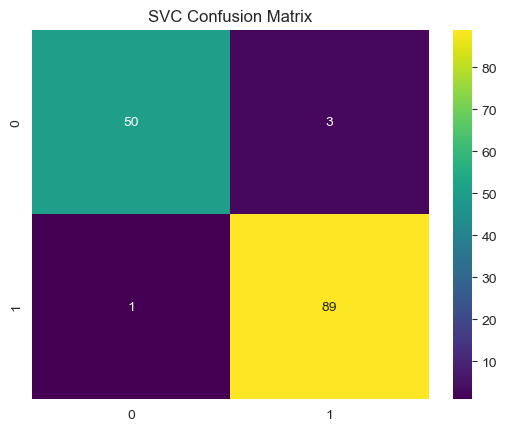

In [124]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title('SVC Confusion Matrix')
print(classification_report(y_test, y_pred))

# 8. XGBoost

###  XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture

In [ ]:
 xgb_pipe = Pipeline(steps=[
 ('scaler', StandardScaler()),
 #('pca', PCA()),
 ('xgb', XGBClassifier())
 ])
 param_grid = {
 #'pca__n_components': np.arange(1, X_train.shape[1]//3),
 'xgb__n_estimators': [100],
    'xgb__learning_rate': np.logspace(-3, 0, 10),
    'xgb__max_depth': np.arange(1, 6),
    'xgb__gamma': np.arange(0, 1.0, 0.1),
    'xgb__reg_lambda': np.logspace(-3, 3, 10)
 }
 xgb_model = GridSearchCV(xgb_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
 xgb_model.fit(X_train, y_train)
 print('Best params: {}'.format(xgb_model.best_params_))
 print('Training Score: {}'.format(xgb_model.score(X_train, y_train)))
 print('CV Score: {}'.format(xgb_model.best_score_))
 print('Test Score: {}'.format(xgb_model.score(X_test, y_test)));
     

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.97      0.96      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



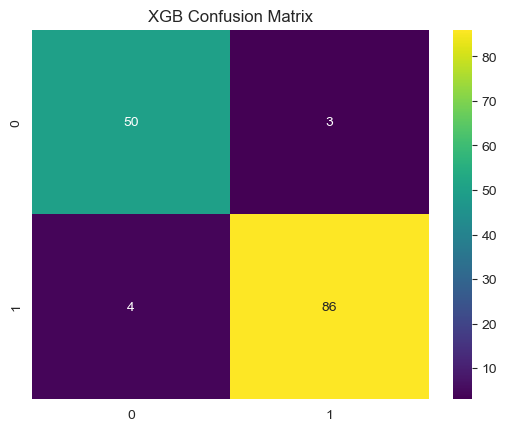

In [125]:
 from sklearn.metrics import classification_report, confusion_matrix
 y_pred = xgb_model.predict(X_test)
 cm = confusion_matrix(y_test, y_pred)
 sns.heatmap(cm, annot=True, cmap = 'viridis')
 plt.title('XGB Confusion Matrix')
 print(classification_report(y_test, y_pred))

# 9. Stacking

###  Stacking (sometimes called Stacked Generalization) is a different paradigm. The point of stacking is to explore a space of different models for the same problem. The idea is that you can attack a learning problem with different types of models which are capable to learn some part of the problem, but not the whole space of the problem. So, you can build multiple different learners and you use them to build an intermediate prediction, one prediction for each learned model. The best estimators for each are used to make uncorrelated predictions which in turn are concatenated and fed into a secondary Support Vector Machine estimator by stacking.

In [126]:
%%time
 models = {
 'KNN': knn_model,
 'GaussianNB': gnb_model,
 'DecisionTree' : DTC_model,
 'LogisticRegression': lgr_model,
 'RandomForests': rdf_model,
   'SVC': svc_model,
    'XGBoost': xgb_model
 }
 y_stacked = pd.DataFrame({model_name: model.predict(X_train) for model_name, model in models.items()})
 y_stacked_train, y_stacked_test, y_train_train, y_train_test = train_test_split(y_stacked, y_train, 
                                                                              random_state=0, stratify=y_train)
 param_grid = {
    'C': np.logspace(0, 3, 10),
    'kernel': ['rbf'],
    'gamma': np.logspace(-3, 3, 10)
 }
 stacked_model = GridSearchCV(SVC(), param_grid=param_grid, verbose=1, n_jobs=-1)
 stacked_model.fit(y_stacked_train, y_train_train)
 print('Best params: {}'.format(stacked_model.best_params_))
 print('Training Score: {}'.format(stacked_model.score(y_stacked_train, y_train_train)))
 print('CV Score: {}'.format(stacked_model.best_score_))
 print('Test Score: {}'.format(stacked_model.score(y_stacked_test, y_train_test)))   

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best params: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
Training Score: 1.0
CV Score: 1.0
Test Score: 0.9906542056074766
CPU times: total: 1.28 s
Wall time: 375 ms


# Evaluation

In [127]:
 y_stacked = pd.DataFrame({model_name: model.predict(X_test) for model_name, model in models.items()})
 y_pred = stacked_model.predict(y_stacked)
 print('Overall Accuracy Score: {:.2%}'.format(accuracy_score(y_test, y_pred)))
 print('Classification report:')
 print(classification_report(y_test, y_pred))


Overall Accuracy Score: 95.80%
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



# Observation

###  There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence). The classifier made a total of 143 predictions (i.e 143 patients were being tested for the presence breast cancer). Out of those 174 cases, the classifier predicted "yes" 92 times, and "no" 51 times. In reality, 90 patients in the sample have the disease, and 53 patients do not

# Final Accuracy Reached- 97% 